In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
# To use only Google Colab
# ! pip install matplotlib --upgrade

# Unidad I. Variables, distribuciones y pruebas de hipótesis. 


## Prueba de Hipótesis.

- Prueba de bondad de ajuste a una distribución.
  - Procedimientos no paramétricos:
    - chi cuadrado
    - Kolmogorov–Smirnov
- Comparación de dos poblaciones.
 - Test de Student y Fischer:
   - para comparar variables independientes con distribución normal.
 - Test de Student para comparar variables apareadas.
 - Alternativas no paramétricas.
   - test de Mann Whitney
   - test de Wicolxon.
 - Otras pruebas de comparación no paramétricas:
   - test de Kolmogorov-Smirnov
   - test de la Mediana.
   - test de los signos
   - test de McNemar.


## Estadística inferencial

- Trata de inferir información acerca de la distribución de probabilidad de una
  población
    - Parte de la información de una muestra.
- Tipos de intervalonferencias:
    - Estimación puntual:
      - Estimación de un parámetro poblacional haciendo uso del valor que mejor
        lo aproxime.
    - Estimación por intervalos:
      - Estimación de un intervalo de valores para un parámetro poblacional
        desconocido.
      - Por ejemplo, la estimación de un intervalo de confianza.
    - Test de hipótesis.



## Test de hipótesis

- Es la evaluación estadítica de una suposición.
  - Se parte de considerar declaración que puede o no ser válida
  - A partir de esta declaración se definen dos hipótesis:
    - la hipótesis nula ($H_0$)
      - Típicamente implica que no hay una relación entre los datos o variables.
    - la hipótesis alternativa ($H_1$)
      - Esta es la hipótesis que queremos apoyar.
  - Se obtienen una muestra de datos para evaluar la hipótesis.
  - Si los datos apoyan $H_1$ con cierto nivel de confienza:
    - rechazo $H_0$ y acepto con $H_1$
    - No quiere decir que se haya demostrado $H_1$
  - Si los datos no apoyan $H_1$
    - no puedo rechazar $H_1$, ni aceptar $H_0$

## Tipos de errores

|                      | **$H_0$ es cierta**  | **$H_1$ es cierta**   |
|-------------------   |-------------------   |--------------------   |
| **Se escogió $H_1$** | *Error de tipo I*    | Decisión correcta     |
| **Se escogió $H_0$** | Decisión correcta    | *Error de tipo II*    |


La probabilidad del error de tipo I
  - se conoce como nivel de significación estadistica
  - indicado con la letra griega $\alpha$.
  - $P(escoger H_1 | H_0 cierta) = \alpha$

La probabilidad de caer en un error del tipo II
  - se anota con la letra griega $\beta$.
  - Siendo $1-\beta$ la potencia o poder del test.
  - $P(escoger H_0 | H_1 cierta) = \beta$
  - $P(escoger H_1 | H_1 cierta) = 1 - \beta$


### Valor P

- El valor P (*p value*)
  - Es la probabilidad de observar:
    - un determinado valor (o uno más extremo)
    - dado que H₀ es correcta.
  - No es la probabilidad de la hipótesis nula.
  - Un valor P bajo indica:
    - que los datos son inconsistentes con la hipótesis nula
    - permitiéndonos rechazarla
    - Para decidir que es un valor bajo
      - se recurre al valor de significación α.
      - debo elegir cuanto error puedo tolerar

### Test de T de Student para una muestra

- Permite evaluar si
  - la media de una muestra es diferente de una media $\mu_0$.
- El uso del test supone:
  - Distribución normal de la variable (continua) en la población
  - Muestreo al azar (cada observación es independiente)
- El estadístico $t$ sigue una distribución *T de Student* con $n - 1$ grados de libertad.
  - $ t = \frac{ \bar{x} - \mu }{ \frac{s}{\sqrt{n}} }$



Supongamos una variable aleatoria $X$ que en la población se distribuye con una
distribución $N(0, 1)$.

- Estamos interesados en apoyar que la media de esa variable $X$ en la
población es mayor a 0.
  - $H_0 : \mu = 0$
  - $H_1 : \mu > 0$
- el *p value* para un valor observado $T$ será:
  - $P(t \ge T|H_0)$

In [2]:
import scipy.stats as st
import math

normal_sample = st.norm.rvs(size = 10, loc=0)
df = len(normal_sample) - 1

# Calculando a mano
t_value = (normal_sample.mean()) / (normal_sample.std()/math.sqrt(df))
pvalue = 1-st.t.cdf(t_value, df)
print(f"El valor del estadístico T es {t_value}")
print(f"El p-valor es {pvalue}")

El valor del estadístico T es -0.6656194857601835
El p-valor es 0.7388271007786513


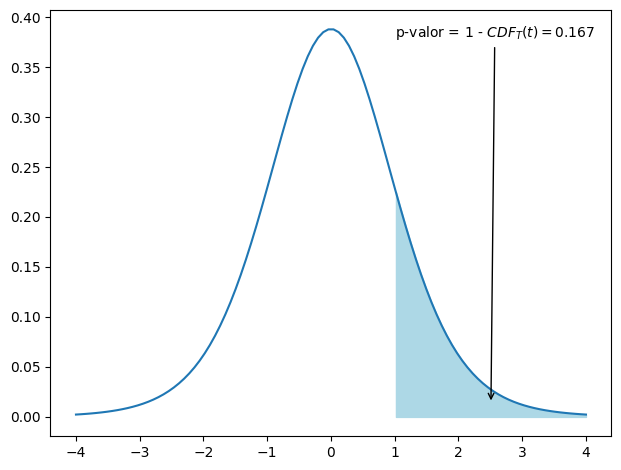

In [3]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-4, 4, 100)

plt.plot(x, st.t.pdf(x, df))

x_fill = np.linspace(t_value, 4, 100)
plt.fill_between(
    x_fill,
    st.t.pdf(x_fill, df),
    color="lightblue"
)

plt.annotate(
    xy = ((4+t_value)/2, st.t.pdf((4+t_value)/2, df)/2),
    xytext = (1, 0.38),
    text = f"p-valor = 1 - $CDF_T(t) = {1-st.t.cdf(t_value, df):0.3f}$",
    arrowprops = {
        "arrowstyle":"->"
    }
)
plt.tight_layout()

In [ ]:
# Usando scipy
test_result = st.ttest_1samp(
    normal_sample,
    popmean=0,
    alternative="greater",
)

- Podemos definir diferentes hipótesis alternativas:
- Es necesario cambiar la definición del *valor P* para estos casos:
  - $H_1 > 0$ (Una cola, mayor)
    - $p_{value} = 1 - CDF_T(t)$
    - El ejemplo anterior
  - $H_1 < 0$ (Una cola, menor)
    - $p_{value} = CDF_T(t)$
  - $H_a \ne 0$ (dos colas)
    - $p_{value} = 2 \times min(CDF_T(t), 1-CDF_T(t)$


In [10]:
one_tail_greater = 1 - st.t.cdf(t_value, df)
one_tail_lower = st.t.cdf(t_value, df)
two_tails = 2 * min(one_tail_greater, one_tail_lower)
print(f"El pvalue de una cola, mayor es {one_tail_greater}")
print(f"El pvalue de una cola, menor es {one_tail_lower}")
print(f"El pvalue de dis colas es {two_tails}")

El pvalue de una cola, mayor es 0.16728437168113985
El pvalue de una cola, menor es 0.8327156283188601
El pvalue de dis colas es 0.3345687433622797


In [14]:
one_tail_greater = st.ttest_1samp(normal_sample, popmean = 0, alternative = "greater")
one_tail_lower = st.ttest_1samp(normal_sample, popmean = 0, alternative = "less")
two_tails = st.ttest_1samp(normal_sample, popmean = 0, alternative = "two-sided")
print(f"El pvalue de una cola, mayor es {one_tail_greater.pvalue}")
print(f"El pvalue de una cola, menor es {one_tail_lower.pvalue}")
print(f"El pvalue de dis colas es {two_tails.pvalue}")

El pvalue de una cola, mayor es 0.16728437168113985
El pvalue de una cola, menor es 0.8327156283188601
El pvalue de dis colas es 0.3345687433622797


Text(0.5, 1.0, 'Dos colas')

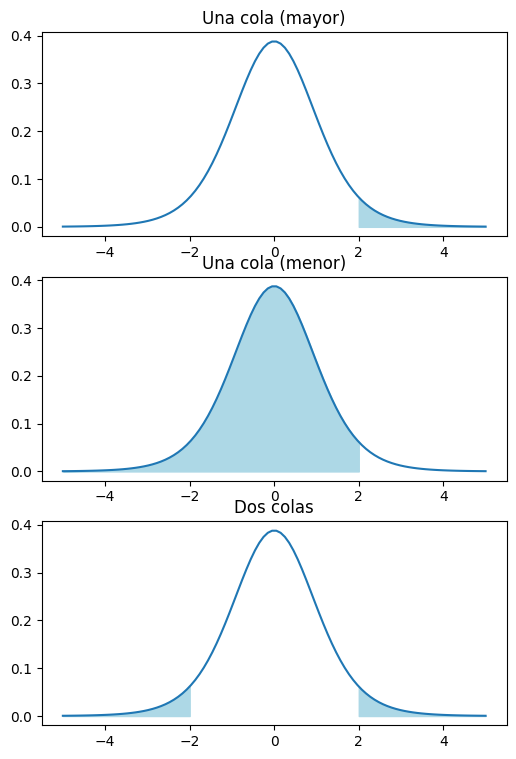

In [34]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-5, 5, 100)
x1 = np.linspace(2, 5, 100)
x2 = np.linspace(-5, 2, 100)
x3 = np.linspace(-5, -2, 100)

fig, axes = plt.subplots(figsize = (6, 9), nrows = 3)

axes[0].plot(x, st.t.pdf(x, 9))
axes[0].fill_between(x1, st.t.pdf(x1, 9), color="lightblue")
axes[0].set_title("Una cola (mayor)")

axes[1].plot(x, st.t.pdf(x, 9))
axes[1].fill_between(x2, st.t.pdf(x2, 9), color="lightblue")
axes[1].set_title("Una cola (menor)")

axes[2].plot(x, st.t.pdf(x, 9))
axes[2].fill_between(x3, st.t.pdf(x3, 9), color="lightblue")
axes[2].fill_between(x1, st.t.pdf(x1, 9), color="lightblue")
axes[2].set_title("Dos colas")




En el caso del test de dos colas:
- Parece evidente:
  - multiplicar por dos al de menor de los p-valores las colas.
- Esto es por la simetría de la distribución.
- En distribuciones asimétricas, no es evidente que hacer:
  - En general se toma la idea de doblar el p-valor menor.

En particular, para una variable aleatoria $X$, que sigue una determinada
distribución si $H_0$ es cierta, dado un estimador $x_0$, el *p value* es:

### Intervalo de confianza

Es un tipo de estimador por intervalo
- para un parámetro de la población.
- Se calcula a partir de una o más muestras
- posee un **nivel de confianza**
  - qué tan frecuentemente una serie de intervalos estimados de la misma manera
  - contiene al parámetro poblacional.
- Un intervalo de confianza del 95%
  - No significa que hay un probabilidad del 95% de contener el parámetro.
- Para una muestra dada
  - Puede darse que el parámetro estimado quede afuera del intervalo.
- Intervalo = $(\bar{x}-t\frac{s}{\sqrt{n}} , \bar{x}+t\frac{s}{\sqrt{n}})$
  - El valor t se elige dependiendo de la confidencia que queremos.
  - $t = Cuantil_T(\alpha / 2)$
  - $\alpha$ es 1 - la confidencia del rango
    - al 95%, $\alpha$ es 0.05

El intervalo es: (-0.4595757885573285, 1.21372116921482)
El intervalo es: (-0.4595757885573287, 1.21372116921482)


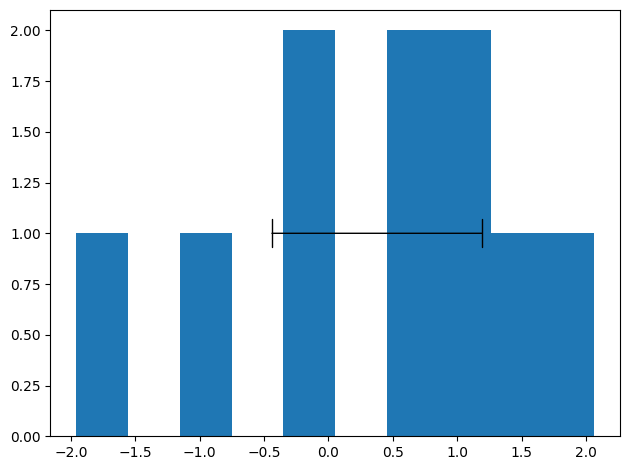

In [59]:
from matplotlib.patches import FancyArrowPatch

interval = st.t.interval(
    confidence = 0.95,
    df = len(normal_sample) - 1,
    loc = normal_sample.mean(),
    scale = normal_sample.std() / math.sqrt(df)
)
print(f"El intervalo es: {interval}")

interval2 = (
    normal_sample.mean() + st.t.ppf(0.025, 9) * (normal_sample.std()/math.sqrt(9)),
    normal_sample.mean() - st.t.ppf(0.025, 9) * (normal_sample.std()/math.sqrt(9))
)
print(f"El intervalo es: {interval2}")

fig, axes = plt.subplots()
axes.hist(normal_sample)

patch = FancyArrowPatch(
    (interval[0], 1),
    (interval[1], 1),
    arrowstyle = "|-|",
    mutation_scale = 10
)
axes.add_patch(patch)
fig.tight_layout()


### Nivel de confianza


In [127]:
import pandas as pd
samples_1000 = pd.Series(np.zeros(1000)).apply(
    st.norm.rvs,
    size = 10
)

intervals = samples_1000.map(
    lambda x: st.t.interval(
        confidence = 0.95,
        df = 9,
        loc = x.mean(),
        scale = st.sem(x)
    )
).explode().to_numpy().reshape((1000,2))

success_ratio = (
    (intervals.T[0] <= 0) & (intervals.T[1] >= 0)
).sum() / 1000
print(
    f"El {success_ratio*100:0.2f}% de las muestras tienen un "
    "intervalo de confianza que contiene la media poblacional"
)

El 94.50% de las muestras tienen un intervalo de confianza que contiene la media poblacional



### Bootstrap

- Se usa para obtener:
  - estimaciones puntuales o por intervalos
    - en particular, intervalos de confianza
  - para parámetros poblacionales
  - sin necesidad de conocer la distribución subyacente.
- se basa en hacer un muestreo aleatorio con reemplazo de nuestra muestra,
  - calculando el parámetro de interés en cada sub-muestra.
- La muestra inicial debe:
  - tener valores independientes
  - idénticamente distribuidos.
- puede presentar problemas con distribuciones discretas y poco densas.


[-0.4250901173321893, 0.4299921883727547]


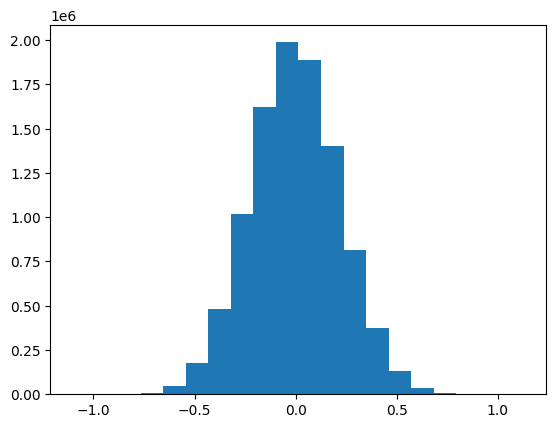

In [154]:
main_sample = st.norm.rvs(size=100)

replicate = pd.Series(
    [
        np.random.choice(
            main_sample,
            size = 25
        )
        for _ in range(10000000)
    ]
)
means = replicate.apply(np.mean)
plt.hist(means, bins = 20)
interval = [
    means.quantile(0.025),
    means.quantile(0.975)
]
print(interval)



## Prueba de bondad de ajuste a una distribución.

- Permite saber si la muestra se ajusta determinada distribución.



### Prueba χ²

Se puede utilizar para testear la bondad de ajuste de:
- cualquier distribución univariada
  - para la cual se pueda calcular la *CDF*.
- Requiere datos en grupos
  - Para poder utilizar el test en una distribución continua
    - debemos discretizar los datos (como en un histograma)
- Es sensible a la elección de los bins.
  - El tamaño muetral debe ser relativamente grande.
- $ χ^{2} = \sum_{i=1}^{k}{\frac{(O_i - E_i)^{2}}{E_i}} $

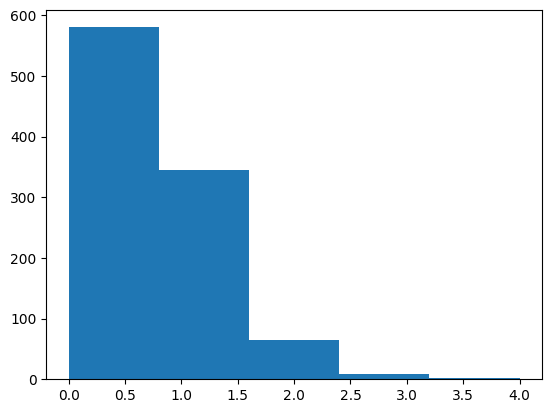

In [26]:
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np

observed = st.binom.rvs(n=10, p=0.05, size = 1000)
_= plt.hist(observed, bins = 5)

In [36]:
obs_cdf = st.cumfreq(
  observed,
  numbins=5,
  defaultreallimits = (0, 5)
).cumcount


teoretical_cdf = st.binom.cdf(
  np.arange(5),
  n=10,
  p=0.035
)
teoretical_cdf = teoretical_cdf * 1000
teoretical_cdf = teoretical_cdf * sum(obs_cdf) / sum (teoretical_cdf)

print(obs_cdf)
print(teoretical_cdf)


[ 580.  925.  989.  998. 1000.]
[676.4876859  921.84591395 961.89142786 965.7645691  966.01040319]


In [37]:
st.chisquare(f_obs=obs_cdf, f_exp=teoretical_cdf)

Power_divergenceResult(statistic=16.80875601206429, pvalue=0.0021054992220241792)

### Prueba de Kolmogórov-Smirnov

- Usa la función de densidad acumulada (*CDF*).
- Su estadístico, $D$:
  - mide la distancia entre:
    - la *CDF* de la distribución de la hipótesis nula,
    - y la *ECDF* de la muestra.
  - Es el valor máximo de las diferencias.
  - $D=0$ si ambas distribuciones acumuladas son idénticas.
- Es un test paramétrico
- La dsitribución nula debe ser **continua**.
- Es sensible tanto a cambios en:
  - la ubicación
  - la escala
- No tiene gran poder
  - puede requerir un tamaño muestral grande para rechazar la hipótesis nula.

In [135]:
import scipy.stats as st

sample_one = st.norm.rvs(size=250)

st.kstest(sample_one, st.norm.cdf)

KstestResult(statistic=0.07353243759903749, pvalue=0.12738494371159936)

## Comparación de dos poblaciones.


In [131]:
import scipy.stats as st

sample_one = st.norm.rvs(size=250)
sample_two = st.norm.rvs(size=250)
sample_three = st.t.rvs(1, size=250)

st.kstest(sample_one, sample_three)

KstestResult(statistic=0.128, pvalue=0.03317804849897538)

### Tests de igualdad de varianza

In [162]:
import sklearn.datasets as datasets

iris = datasets.load_iris(as_frame=True)

iris["frame"].groupby("target").var()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target,,,,
0,0.124249,0.143690,0.030159,0.011106
1,0.266433,0.098469,0.220816,0.039106
2,0.404343,0.104004,0.304588,0.075433


### F test de igualdad de varianzas

- Asume que las dos distribuciones son normales
- La hipótesis nula es que las varianzas son iguales.

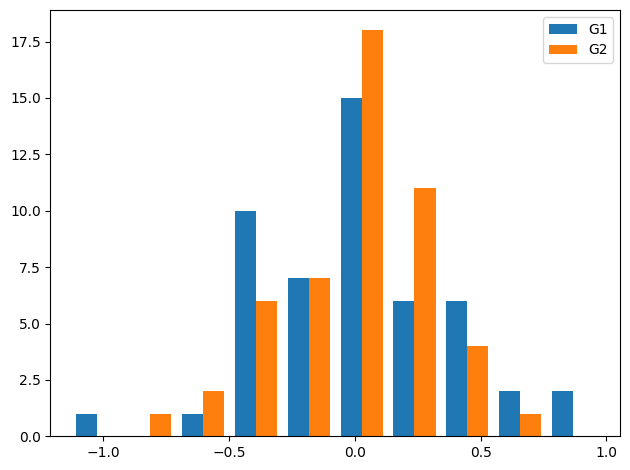

In [223]:
g1 = iris["frame"].loc[iris["frame"]["target"]==0, "sepal width (cm)"]
g2 = iris["frame"].loc[iris["frame"]["target"]==1, "sepal width (cm)"]
plt.hist(
  [g1-g1.mean(), g2-g2.mean()],
  label = ["G1", "G2"]
)
plt.legend()
plt.tight_layout()

Comprobemos que las distribuciones "son" normales.

In [221]:
r1 = st.shapiro(g1)
r2 = st.shapiro(g2)
for x in (r1, r2):
  print(x.pvalue)

0.2715126574039459
0.3379843533039093


In [224]:
f_statistic = g1.var() / g2.var()
pvalue = 1 - st.f.cdf(
  f_statistic,
  g1.size-1,
  g2.size-1
)
print(pvalue)

0.09474426415706627


### Test de igualdad de varianzas de Bartlett

- No requiere que las distribuciones sean normales.
- Pero, no se recomienda usarlo si las distribuciones se alejan mucho de
  la normalidad.


In [227]:
st.bartlett(g1, g2)

BartlettResult(statistic=1.7216251488751655, pvalue=0.1894839869728239)

### test de igualdad de varianzas de Levene

- Es más robusto ante distribuciones no normales.

```{r}
#library("car")
leveneTest(
    extra ~ group,
    sleep)
```



### Test de Student para dos muestras

El test de Student asume que las varianzas son iguales, pero
existe una alternativa a este test, test de Welch, que no
requiere asumir esta condición.

```{r}
sample_1 <- rnorm(n=25, mean=2, sd=1)
sample_2 <- rnorm(n=25, mean=5, sd=6)

t.test(
    x = sample_1,
    y = sample_2,
    var.equal = TRUE
)

t.test(
    x = sample_1,
    y = sample_2,
    var.equal = FALSE
)
```



#### Test de Student para muestras apareadas

Asume que los valores de ambas muestras corresponden a los mismos individuos en dos condiciones diferentes. Por ejemplo, antes y después de un tratamiento.

```{r}
sample_1 <- rnorm(25, 0, 1)
sample_2 <- sample_1 + runif(25, 0, 0.02)

sapply(
    c(TRUE, FALSE),
    FUN=function(x) t.test(sample_1, sample_2, paired=x)
)



```



### Alternativas no paramétricas



#### Mann Whitney

- Todas las observaciones son independientes en ambos grupos.
- La hipótesis nula asume que las distribuciones de las dos poblaciones son iguales.
- La hipótesis alternativa es que las dos distribuciones no son iguales.

```{r}
    sample_1 <- rexp(25, 1)
    sample_2 <- rexp(25, 2)
    t.test(
        sample_1,
        sample_2
    )
    wilcox.test(
        sample_1,
        sample_2
    )

```



#### Wilcoxon signed rank text

```{r}
sample_1 <- rexp(25, 1)
sample_2 <- sample_1 + runif(25,0,.5)
wilcox.test(
    sample_1,
    sample_2
)
wilcox.test(
    sample_1,
    sample_2,
    paired=TRUE)

```




#### Kolmogorov-Smirnov

```{r}
sample_1 <- rexp(25, 1)
sample_2 <- rexp(25, 4)

hist(
  sample_1,
  col="#FF000077")

hist(
  sample_2,
  col="#0000FF77",
  add=TRUE)


ks.test(
    sample_1,
    sample_2
)
```



#### Test de signos

En muestras pareadas, si la $H_0$ es verdad,
el número de veces que la diferencia entre pares es positiva debe distribuirse como una binomial con probabilidad 0.5.

```{r}
sample_1 <- rexp(25, 1)
sample_2 <- sample_1 + runif(25, -3, 3)

positives <- sum(sample_2>sample_1)
negatives <- sum(sample_2<sample_1)

pbinom(
    c(positives,negatives),
    size = 25,
    prob = 0.5,
    lower.tail = FALSE
)

sample_1 <- rexp(25, 1)
sample_2 <- sample_1 + runif(25, -1, 3)

positives <- sum(sample_2>sample_1)
negatives <- sum(sample_2<sample_1)

pbinom(
    c(positives,negatives),
    size = 25,
    prob = 0.5,
    lower.tail = FALSE
)


```



#### Test de la mediana

Es un caso especial de la prueba de **chi-cuadrado**. Esta prueba posee poco poder.  
Se calcula la mediana para todos los datos ($x$ e $y$), estableciéndose dos grupos (por encima o por debajo de ésta). Luego se arma una tabla de contingencia con esta nueva variable versus las dos variables anteriores ($x$ e $y$).


```{r}
sample_1 <- rbinom(25, 15, 0.04 )
sample_2 <- rbinom(25, 15, 0.1 )
m <- median(c(sample_1, sample_2))

table(c(sample_1, sample_2)>=m,
    rep(1:2, each=25))

chisq.test(
    table(
        c(sample_1, sample_2)>=m,
        rep(1:2, each=25)))

```



#### Test de Fischer

Se usa si se tienen dos variables nominales, y se quiere saber si
las proporciones de una variable se mantiene entre los valores de
la otra variable.


```{r}
sample_1 <- rbinom(25, 15, 0.04 )
sample_2 <- rbinom(25, 15, 0.1 )
fisher.test(
    table(
        c(sample_1, sample_2)>=m,
        rep(1:2, each=25))
)

```



#### McNemar test

Se usa para buscar diferencias en tablas de contingencia cuando se tienen muestra aparedas.

```{r}
sample_1 <- rbinom(25, 15, 0.04 )
sample_2 <- sample_1 + runif(25, 1, 2 )
mcnemar.test(
    table(
        c(sample_1, sample_2)>=m,
        rep(1:2, each=25))
)
fisher.test(
    table(
        c(sample_1, sample_2)>=m,
        rep(1:2, each=25))
)
```
